In [14]:
#script by rikardoroa
#just pythonit!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr
from matplotlib.colors import ListedColormap

class data_cleaning():
    #utilizamos plantilla de seaborn
    sns.set()
    
    #inicializacion
    def __init__(self, data = pd.DataFrame(),clean_data = pd.DataFrame()):
        self.data = pd.read_csv('C:\\Users\\rikar\\Documents\\bd_data\\data.csv', header=None, encoding='latin-1', sep=';')
        self.clean_data = clean_data
        
    #lectura y renombramiento de columnas
    def data_read(self):
        aux = []
        cols=['Id','Marca','Modelo','Año','Costo','Localidad_Origen','Localidad_Destino','Sexo','Valor_1','Km_Inicial','Km_Final','Color','Valor_3','Valor_2']
        data = self.data
        counter =  data.columns.size
        
        for item in range(counter):
            aux.append(item)
            
        #se ejecuta el renombramiento
        json_cols = dict(zip(aux,cols))  
        data = data.rename(columns=json_cols) 
        self.data = data
        return data.head()
    
    #exploracion inicial 
    def explore_data(self):
        data = self.data
        return data.describe(include='object'), data.describe()
    
    
    #verificamos si hay duplicados
    def explore_duplicates(self):
        data = self.data
        
        #vemos las ocurrencia de todas las filas que se repitan
        if  data[data.duplicated(keep=False)].shape[0]>0:
            cols = []
            for col in data.columns:
                cols.append(col)
            data = data[~data.duplicated(subset=cols,keep=False)].drop_duplicates()#verificamos todas las ocurrencias de las filas
            self.clean_data = data
            return data
        
        else:
            self.clean_data = data
            return data
        
    
    def exploring_nulls_inf(self):
        data = self.data
        #verificando si hay datos nulos o datos con valor infinito o - infinito en el dataframe
        return ({col : data[data[col].isin([np.inf, -np.inf])].shape[0] for col in data.columns},
               {col : data[data[col].isna()].shape[0] for col in data.columns})
    
    
    
    def discovery_data(self):
        Population = pd.DataFrame()
        data = self.data
        
        
        #agrupando y contando valores
        values = data.groupby(['Marca','Año','Sexo'])['Sexo'].agg(['count']).rename(columns={'count':'Conteo'}).\
        sort_values('Conteo',ascending=True)
        Population= values 
        Population = Population.reset_index() 
        
        #agrupamos los valores
        y_values=[]
        x_values=[]
        
        #definimos valores del eje y , agrupamos los totales por año
        data = Population.groupby(['Año'])['Conteo'].agg(['sum']).rename(columns={'sum':'totales'}).reset_index()
        for item in data.totales:
            y_values.append(item)
        y = y_values
        
        #definimos los valores del eje x
        x = Population['Año']
        for item in  x:
            x_values.append(item)
            x_values= list(dict.fromkeys(x_values))
            x_values.sort()
        x=x_values
        
        #generamos el grafico
        fig, ax = plt.subplots(figsize=(10,7))
        plot = ax.bar(x, y,color=['#ff9999',  '#4da6ff'])
        for container in ax.containers:
            ax.bar_label(container,labels=[f'{p.get_height():,}' for p in container])
        ax.set_title('Totalizado de los mayores registro de Marcas(Autos) Por Año',fontweight='bold')
        ax.set_xlabel('Año')
        ax.set_ylabel('Cantidad')
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        
        #instanciamos el nuevo df
        self.data = Population
        
        return plt.show()
        
        
    def discovery_data_by_genre(self):
        #filtrando la data
        data = self.data
        final_data = self.data
        totales_gen_f  = data.loc[data['Sexo']=='F'].groupby(['Año'])['Conteo'].agg(['sum']).rename(columns={'sum':'totales'}).reset_index()
        totales_gen_m  = data.loc[data['Sexo']=='M'].groupby(['Año'])['Conteo'].agg(['sum']).rename(columns={'sum':'totales'}).reset_index()
       
        #transformando los datos iniciales para los ejes x, y
        y_values_f=[]
        y_values_m=[]
        label_years =[]
        
        for item in totales_gen_f.totales:
            y_values_f.append(item)
        for item in totales_gen_m.totales:
            y_values_m.append(item)
        for item in totales_gen_f.Año:
            label_years.append(item)
            
        
        
        #generando el grafico
        labels = label_years
        x = np.arange(len(labels))  
        width = 0.35  
        fig, ax = plt.subplots(figsize=(10,7))
        rects1 = ax.bar(x - width/2, y_values_f, width, label='F')
        rects2 = ax.bar(x + width/2, y_values_m, width, label='M')

        #agregando label a los ejes x,y
        ax.set_ylabel('Cantidad')
        ax.set_xlabel('Año')
        ax.set_title('Totalizado de los mayores registro de Marcas(Autos) Por Genero y Año',fontweight='bold')
        ax.set_xticks(x, labels)
        ax.legend()
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        for container in ax.containers:
            ax.bar_label(container,labels=[f'{p.get_height():,}' for p in container])
        fig.tight_layout()
        return plt.show()
        

        
    def Average_per_year(self):
        
        #calculamos el promedio por año
        x_values=[]
        y_values=[]
        Average_Costo = self.clean_data
        Average_Costo = Average_Costo.groupby(['Año'])['Costo'].agg(['mean']).rename(columns={'mean':'Promedio'}).reset_index()
        
        #generando los valores para los ejes x,y
        x = Average_Costo[['Año']]
        for item in x.Año:
            x_values.append(item)
            
        y = Average_Costo[['Promedio']].astype(int)
        for item in y.Promedio:
            y_values.append(item)
        y = y_values
        x = x_values
        
  
        #generando el grafico
        fig, ax = plt.subplots(figsize=(10,7))
        ax.plot(x, y,  '-gD')
        titulo = plt.suptitle('Costo Promedio por Año', fontname='arial', fontsize=12,fontweight='bold')
        plt.setp(titulo,color='black')
        plt.xlabel("Año",fontsize=12)
        plt.ylabel("Costo",fontsize=12)
        #formateamos con el separador de miles
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        #visualizamos los valores en las barras del plot
        for x,y in zip(x,y):
            etiqueta = "{:,}".format(y)
            ax.annotate(etiqueta, (x,y), textcoords="offset points",xytext=(0,10),ha="center")
        
        ax.grid(True)
        return plt.show()
        
       
        
    def max_sales_per_year(self):
        #generamos las transformacion para calcular la marca mas usada por año
        Max_Sales = self.clean_data
        Max_Sales_right = self.clean_data
        Max_Sales = Max_Sales.groupby(['Año','Marca'])['Marca'].agg(['count'], ascending=True).rename(columns={'count':'Total'}).\
        reset_index()
        Max_Sales = Max_Sales.groupby(['Año'])['Total'].agg(['max'], ascending=True).rename(columns={'max':'Total'}).reset_index()
        Max_Sales_right = Max_Sales_right.groupby(['Año','Marca'])['Marca'].agg(['count'], ascending=True).rename(columns={'count':'Total'}).\
        reset_index()
        
        #Realizamos un inner join entre ambos dataframes
        total_sales_per_year = pd.merge(left=Max_Sales_right,right=Max_Sales,how="inner", on=["Año","Total"])
        
        #generamos el grafico
        fig, ax = plt.subplots(figsize=(15,7))
        ax = sns.barplot (x="Año", y="Total", hue="Marca", data=total_sales_per_year)
        ax.set_xlabel('Año',fontsize='15')
        ax.set_ylabel('Total',fontsize='15')
        ax.set_title('Registro maximo de marca mas usada por año',fontweight='bold')
        ax.set_xticklabels(ax.get_xmajorticklabels())
        ax.set_yticklabels(ax.get_yticks(), fontsize = '12')
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        plt.setp(ax.get_legend().get_texts(), fontsize='12') 
        plt.setp(ax.get_legend().get_title(), fontsize='12')
        
        #formateamos los label del plot con el separador de miles
        for container in ax.containers:
            ax.bar_label(container,labels=[f'{p.get_height():,}' for p in container])
             
        return  plt.show() 
    
    
    
    def max_sales_per_vehicle_year(self):
        Max_Per_Year_Left = self.clean_data
        Max_Per_year_right = self.clean_data
        
        #generamos las agrupaciones para generar el primer dataframe
        Max_Per_Year_Left = Max_Per_Year_Left.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
        rename(columns={'count':'Total'}).reset_index()
        Max_Per_Year_Left = Max_Per_Year_Left.groupby(['Año','Sexo'])['Total'].agg(['max'], ascending=True).\
        rename(columns={'max':'Total'}).reset_index()
        
        #generamos las agrupaciones para generar el segundo dataframe
        Max_Per_year_right =  Max_Per_year_right.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
        rename(columns={'count':'Total'}).reset_index()
        
        #realizamos un inner join 
       
        max_vehicle_brand_per_year = pd.merge(left=Max_Per_Year_Left,right=Max_Per_year_right,how="inner", on=["Año","Total","Sexo"])
        
        #generamos el grafico
        
        label=[]
        Total_F=[]
        Total_M=[]
        Marcas= []
        
        Año = max_vehicle_brand_per_year[['Año']]
        for item in Año.Año:
            label.append(item)
       
        F_Values = max_vehicle_brand_per_year.loc[max_vehicle_brand_per_year['Sexo']=='F']
        for item in F_Values.Total:
            Total_F.append(item)
        
        M_Values = max_vehicle_brand_per_year.loc[max_vehicle_brand_per_year['Sexo']=='M']
        for item, marca in zip (M_Values.Total,F_Values.Marca):
            Total_M.append(item)
            Marcas.append(marca)
            
        #Generando los valores para los graficos
        label = list(dict.fromkeys(label))
        width = 0.35 
        axes_labels=[]
        axes_labels.append(label)
        axes_labels.append(Marcas)
        
        #generando los graficos
        for i in range(len(axes_labels)):
            fig, ax = plt.subplots(figsize=(10,7))
            colors = ['#99b3ff', '#ffcccc']
            ax.bar(axes_labels[i], Total_F, width, label='F', color=colors[0])
            ax.bar(axes_labels[i], Total_M, width, bottom=Total_F, label='M', color=colors[1])
            ax.set_ylabel('Cantidad')
            ax.set_title('Comparativo del registro maximo de marca mas usada por año y Genero',fontweight='bold')
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
            for container in ax.containers:
                ax.bar_label(container,labels=[f'{p.get_height():,}' for p in container])
            fig.tight_layout()
            ax.legend()
        return plt.show()
            
            
    def min_sales_per_vehicle_year(self):
        #instanciamos el dataframe limpio
        Min_Per_Year_Left = self.clean_data
        Min_Per_year_right = self.clean_data
        
        #generamos las agrupaciones para generar el primer dataframe
        Min_Per_Year_Left = Min_Per_Year_Left.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
        rename(columns={'count':'Total'}).reset_index()
        Min_Per_Year_Left = Min_Per_Year_Left.loc[Min_Per_Year_Left['Marca']!='MARCA NULA'].groupby(['Año','Sexo'])['Total'].agg(['min'], ascending=True).\
        rename(columns={'min':'Total'}).reset_index()
        
        #generamos las agrupaciones para generar el segundo dataframe
        Min_Per_year_right =  Min_Per_year_right.loc[Min_Per_year_right['Marca']!='MARCA NULA'].\
        groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
        rename(columns={'count':'Total'}).reset_index()
        
        #realizamos un inner join 
        min_vehicle_brand_per_year = pd.merge(left=Min_Per_Year_Left,right=Min_Per_year_right,how="inner", on=["Año","Total","Sexo"])
        
        #generamos los datos para los ejes x y y
        label=[]
        Total_F=[]
        Total_M=[]
   
        Año = min_vehicle_brand_per_year[['Año']]
        for item in Año.Año:
            label.append(item)
        
        F_Values = min_vehicle_brand_per_year.loc[min_vehicle_brand_per_year['Sexo']=='F']
        F_Values["Marca-Genero"] = F_Values[['Sexo', 'Marca']].apply(lambda x: f"{x.Marca}, {x.Sexo}", axis=1)
        for item in F_Values.Total:
            Total_F.append(item)
        
        M_Values = min_vehicle_brand_per_year.loc[min_vehicle_brand_per_year['Sexo']=='M']
        M_Values["Marca-Genero"] = M_Values[['Sexo', 'Marca']].apply(lambda x: f"{x.Marca}, {x.Sexo}", axis=1)
        for item in M_Values.Total:
            Total_M.append(item)
            
            
        
        axes_labels=[]
        axes_labels.append(F_Values)
        axes_labels.append(M_Values)
        
        #generamos los graficos
        for i in range(len(axes_labels)):
            fig, ax = plt.subplots(figsize=(15,10))
            ax = sns.barplot(x = 'Año', y = 'Total',hue="Marca-Genero", data = axes_labels[i])
            ax.set_xlabel('Año',fontsize='15')
            ax.set_ylabel('Total',fontsize='15')
            ax.set_title('Comparativo del registro minimo de marca mas usada por año y Genero',fontweight='bold')
            ax.set_xticklabels(ax.get_xmajorticklabels())
            ax.set_yticklabels(ax.get_yticks(), fontsize = '12')
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
            ax.tick_params(length=1, axis='x')
            plt.setp(ax.get_legend().get_texts(), fontsize='12') 
            plt.setp(ax.get_legend().get_title(), fontsize='12')

            #formateamos los label del plot con el separador de miles
            for container in ax.containers:
                ax.bar_label(container)

        return plt.show()
    
    
    def Average__Km_Per_year(self):
        
        #Inicializamos el dataframe limpio
        Average__Km_Per_year = self.clean_data
        
        #generamos las agrupaciones para generar el primer dataframe
        Average__Km_Per_year['Km_Inicial'] = Average__Km_Per_year['Km_Inicial'].astype(str).\
        apply(lambda x : x.replace(',','.')).astype(float)
        Average__Km_Per_year = Average__Km_Per_year.groupby(['Año']).agg({'Km_Inicial':['mean'],'Km_Final':['mean']}, ascending=True).\
        rename(columns={'Km_Inicial':'Km_Inicial','Km_Final':'Km_Final' }).reset_index()
        Average__Km_Per_year['Km_Inicial'] = Average__Km_Per_year['Km_Inicial'].apply(lambda x : np.where(x.isnull(),0,x))
        
        #formateando valores
        cols = ['Km_Inicial','Km_Final']
        for item in cols:
            Average__Km_Per_year[item] = Average__Km_Per_year[item].astype('int64')
            
          
        #Generando el grafico
        Average__Km_Per_year = pd.melt(Average__Km_Per_year, 'Año', var_name='Promedios', value_name='Promedio')
        fig, ax = plt.subplots(figsize=(15,10))
        ax = sns.lineplot(x='Año', y='Promedio', hue='Promedios', data=Average__Km_Per_year,  marker='o',)
        ax.set_xlabel('Año',fontsize='15')
        ax.set_ylabel('Total',fontsize='15')
        ax.set_title('Kilometros Promedio por año',fontweight='bold')
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        ax = plt.gca()
        
        #formateamos los label del plot con el separador de miles
        for x, y in zip(Average__Km_Per_year['Año'], Average__Km_Per_year['Promedio']):
            plt.text(x , y, s = '{:,}'.format(y),color = 'red')
        return plt.show()
    
    
    def most_common_brand(self):
        
        #Inicializamos el dataframe limpio
        Brands = self.clean_data
        
        #generamos las agrupaciones para generar el primer dataframe
     
        Brands = Brands.groupby(['Marca'])['Marca'].agg(['count']).\
        rename(columns={'count':'Total'}).sort_values('Total',ascending=False).reset_index().head(10)
        #Brands['Total'] = Brands['Total'].apply(lambda x :'{:,}'.format(x)).astype(str)
        
        
        #Generando el Grafico
        fig, ax = plt.subplots(figsize=(15,10))
        ax = sns.barplot(x="Total", y="Marca", data=Brands, color="b")
        ax.set_xlabel('Total',fontsize='15')
        ax.set_ylabel('Marcas',fontsize='15')
        ax.set_title('Top 10 Marcas mas usadas',fontweight='bold')
        
        #formateamos el eje con separador de miles
        ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
        
        #Generamos el label en el grafico
        for container in ax.containers:
            ax.bar_label(container,labels=[f'{p.get_width():,}' for p in container])
        

        return plt.show()
        
        

    
        

        
        
                              
                                                     
                                                    
        
        
       
     
        
    
    
    
    
    
    
    
    
    
    

In [15]:
data_read = data_cleaning()
data_read.data_read()

,Id,Marca,Modelo,Año,Costo,Localidad_Origen,Localidad_Destino,Sexo,Valor_1,Km_Inicial,Km_Final,Color,Valor_3,Valor_2
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,09,M,NaN,"11947500,0",NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,05,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S


In [16]:

data_read.explore_data()

(                  Id    Marca   Modelo Localidad_Origen Localidad_Destino  \
 count        1006969  1006274  1006681           574639            594577   
 unique        689577       96    10762              429                41   
 top     6EA085C0-77B  HYUNDAI    RAV 4       LAS CONDES                13   
 freq               8   106758    18619            45799            152997   
 
           Sexo Km_Inicial   Color  Valor_2  
 count   122608     609000  994400  1006969  
 unique       2       5946     953        2  
 top          M          0    GRIS        S  
 freq     67439     270604  231524   688992  ,
                 Año         Costo   Valor_1      Km_Final        Valor_3
 count  1.006969e+06  1.006969e+06  197779.0  3.411520e+05  723490.000000
 mean   2.013540e+03  5.650004e+07       0.0  2.015180e+07      48.930039
 std    2.352165e+00  6.439853e+07       0.0  1.681418e+04      12.587792
 min    2.010000e+03  0.000000e+00       0.0  2.009102e+07       3.000000
 25%   

In [17]:
data_read.explore_duplicates()

,Id,Marca,Modelo,Año,Costo,Localidad_Origen,Localidad_Destino,Sexo,Valor_1,Km_Inicial,Km_Final,Color,Valor_3,Valor_2
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,09,M,NaN,"11947500,0",NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,05,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006964,3C64A6BD-180,CHEVROLET,TRACKER LT 1.8,2016,43286592,NaN,NaN,NaN,NaN,11176000,NaN,AZUL,NaN,S
1006965,CAF45D98-12D,RENAULT,DUSTER,2016,321224931,VICUNA,04,NaN,NaN,NaN,NaN,GRIS,NaN,S
1006966,684771E1-3B8,HONDA,CRV EX 4X4 2.4 AUT,2011,43881138,MAIPU,METROPOLITANA DE SANTIAGO,NaN,0.0,11930000,NaN,BLANCO,40.0,S
1006967,B150A94C-313,TOYOTA,RAV4 2.4 AUT,2010,26216251,LAS CONDES,13,NaN,NaN,7290000,20130213.0,BEIGE,58.0,S


In [18]:
data_read.exploring_nulls_inf()

({'Id': 0,
  'Marca': 0,
  'Modelo': 0,
  'Año': 0,
  'Costo': 0,
  'Localidad_Origen': 0,
  'Localidad_Destino': 0,
  'Sexo': 0,
  'Valor_1': 0,
  'Km_Inicial': 0,
  'Km_Final': 0,
  'Color': 0,
  'Valor_3': 0,
  'Valor_2': 0},
 {'Id': 0,
  'Marca': 695,
  'Modelo': 288,
  'Año': 0,
  'Costo': 0,
  'Localidad_Origen': 432330,
  'Localidad_Destino': 412392,
  'Sexo': 884361,
  'Valor_1': 809190,
  'Km_Inicial': 397969,
  'Km_Final': 665817,
  'Color': 12569,
  'Valor_3': 283479,
  'Valor_2': 0})

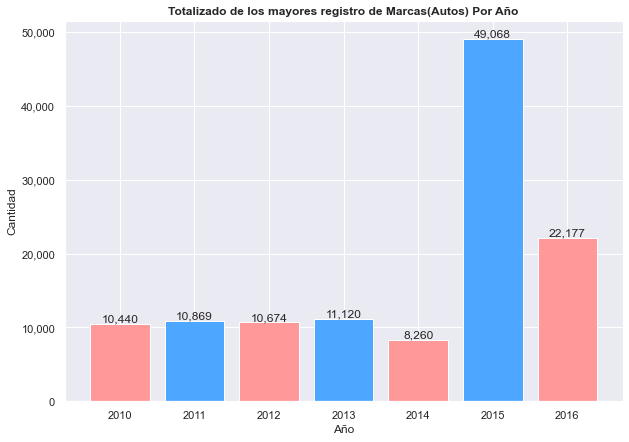

In [19]:
data_read.discovery_data()

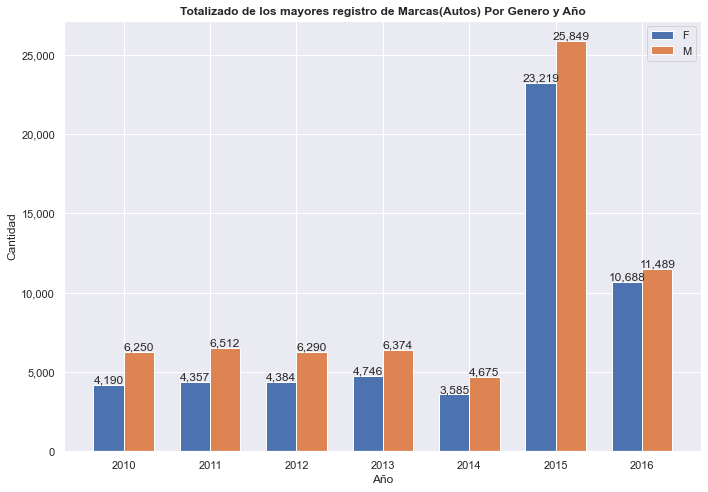

In [20]:
data_read.discovery_data_by_genre()

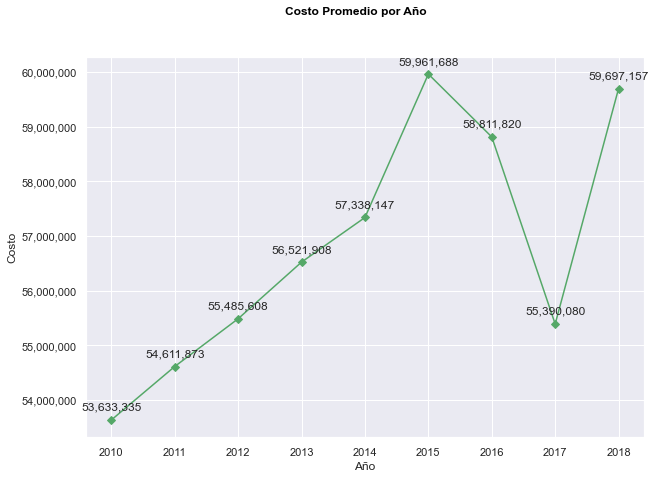

In [21]:

data_read.Average_per_year()

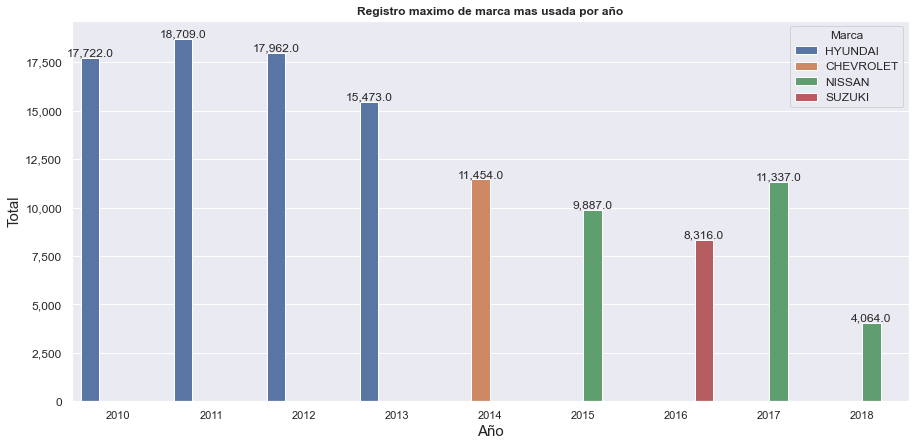

In [22]:
data_read.max_sales_per_year()
        
     

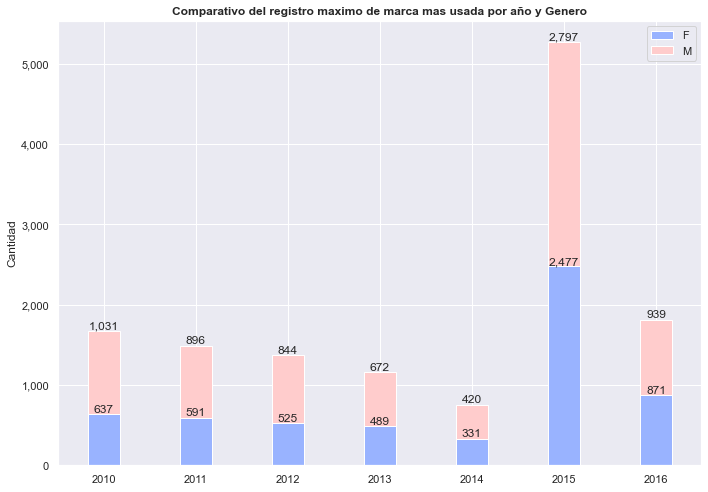

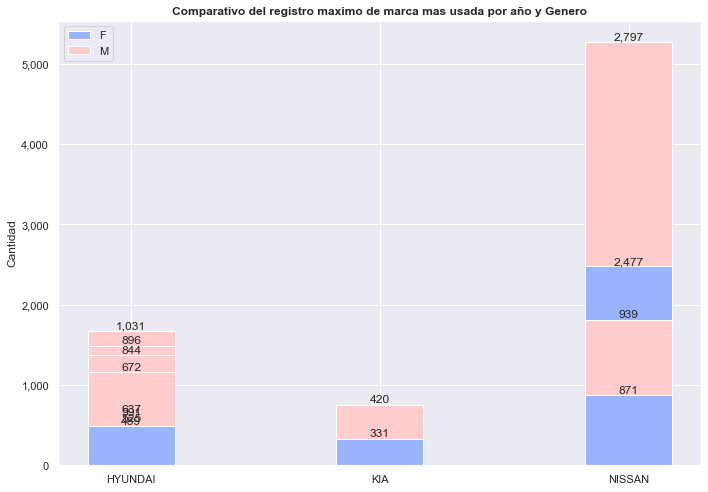

In [23]:
data_read.max_sales_per_vehicle_year()

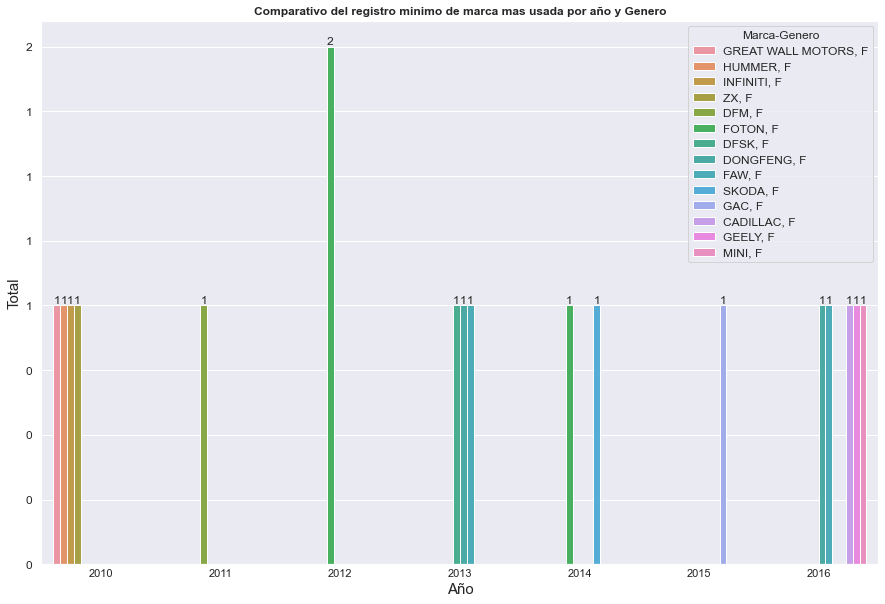

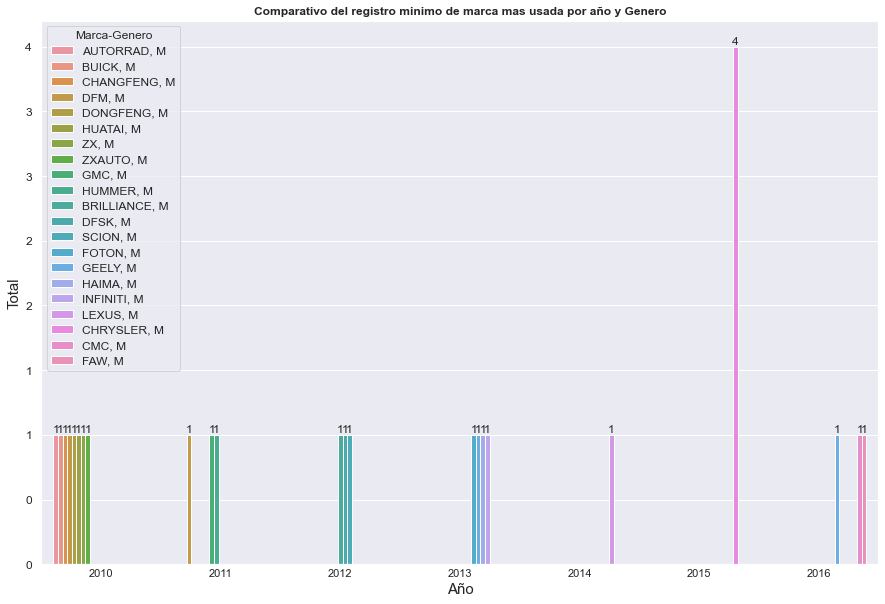

In [24]:
data_read.min_sales_per_vehicle_year()

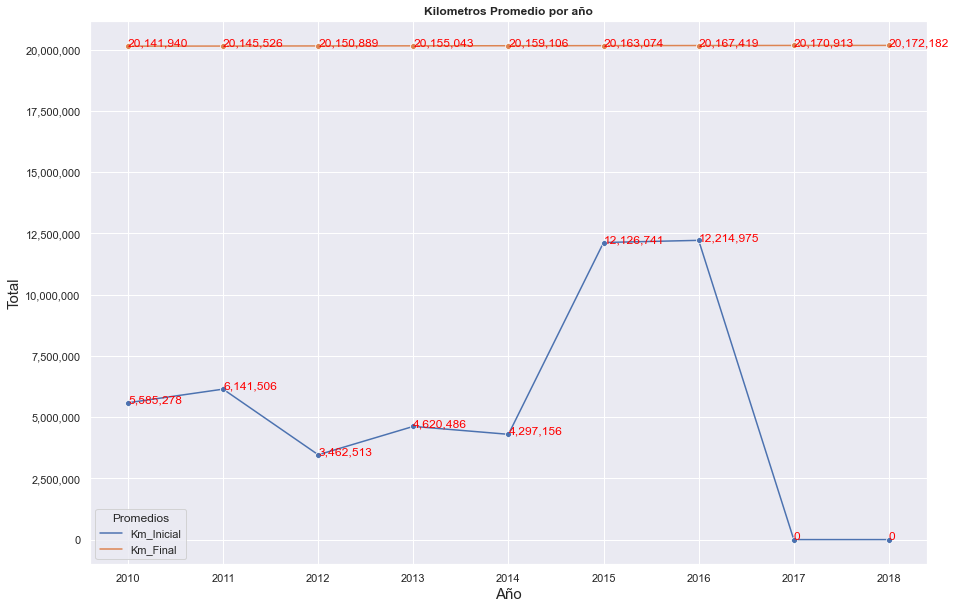

In [25]:
data_read.Average__Km_Per_year()

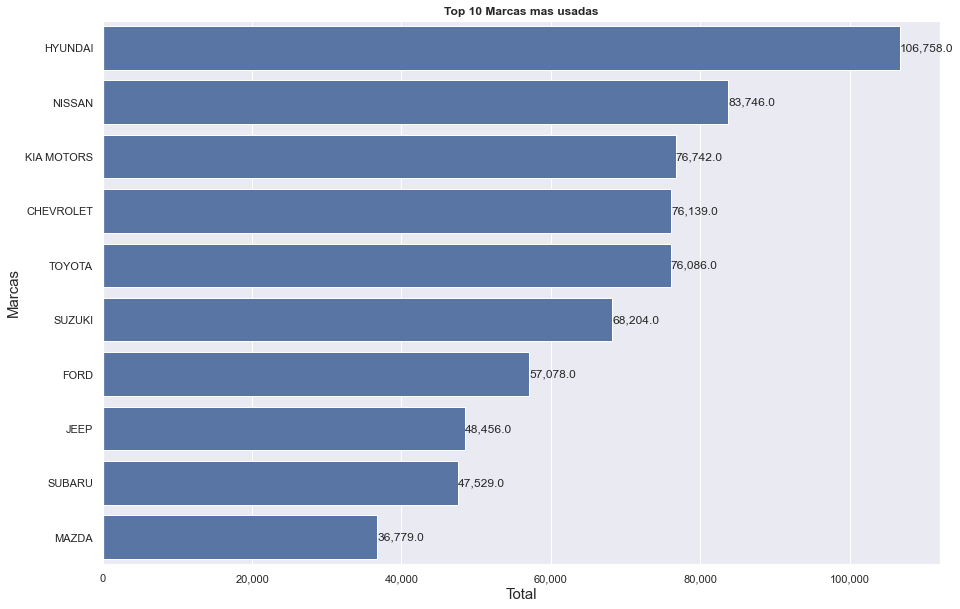

In [26]:
data_read.most_common_brand()